# Customer Churn Analysis

###  1. Impport Packages and Load dataset
###  2. Data Cleaning
    Handling Missing Values
    Feature Scaling
    Outliers
### 3. Data Exploration
    Univariate Analysis
    Category feature analysis
    Nummerical feature Analysis

###  1. Impport Packages and Load dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"E:\EDA_Practice\CustomerChurn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


    The average tenure is 32.37 months, with a broad range from 0 to 72 months, suggesting varying levels of customer loyalty.
    
    Notably, 25% of customers have tenures of 9 months or less, indicating potential early churn.
    
    The average monthly charge is $64.76, with  charges  ranging  from  $18.25  to $118.75,  reflecting  diverse  service  plans  and  spending  behaviors.
     The  median  monthly  charge of $70.35 suggests many customers are on mid to high-tier plans.
    
    These insights highlight the need for tailored customer retention strategies, focusing on short-tenure customers and understanding spending patterns to improve customer satisfaction and reduce churn.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
df["Churn"].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

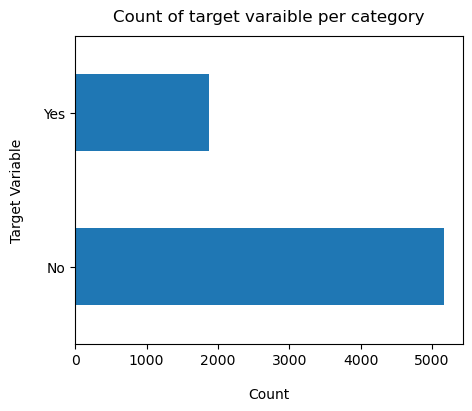

In [10]:
df["Churn"].value_counts().plot(kind='barh',figsize=(5,4))
plt.xlabel('Count',labelpad=14)
plt.ylabel('Target Variable',labelpad=14)
plt.title('Count of target varaible per category',y=1.02)
plt.show()

###  2. Data Cleaning
    Handling Missing Values
    Feature Scaling
    Outliers

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

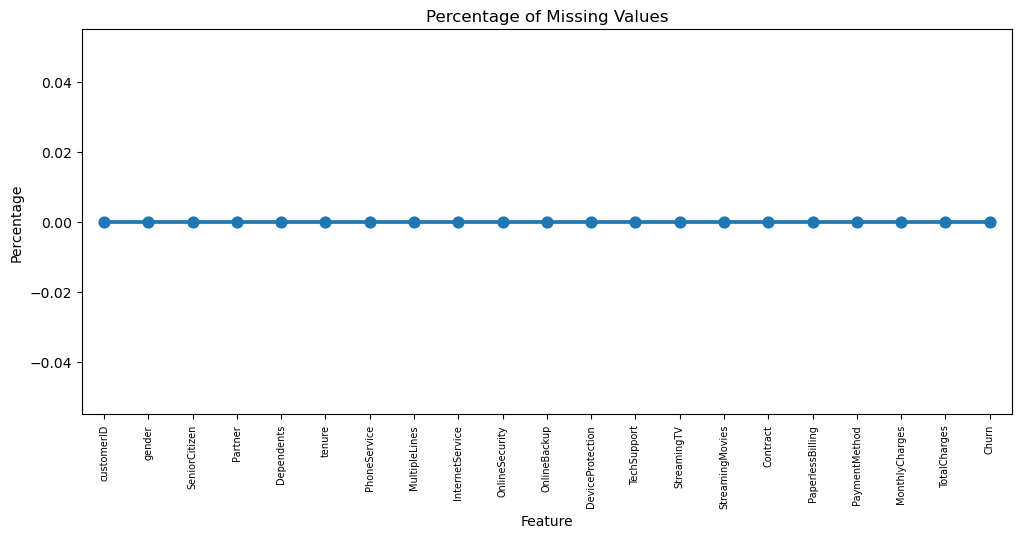

In [12]:
missing = pd.DataFrame({
    'Feature': df.isnull().sum().index,
    'Percentage': (df.isnull().sum() * 100) / df.shape[0]
}).reset_index(drop=True)

plt.figure(figsize=(12, 5))
ax = sns.pointplot(x="Feature", y="Percentage", data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Feature")
plt.show()

In [13]:
new_df=df.copy()

In [14]:
new_df.TotalCharges=pd.to_numeric(new_df.TotalCharges,errors='coerce')


In [15]:
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
new_df.dropna(how='any',inplace=True)

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [19]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [20]:
labels=["{0}-{1}".format(i,i*11) for i in range(1,72,12)]
labels

['1-11', '13-143', '25-275', '37-407', '49-539', '61-671']

In [21]:
labels=["{0}-{1}".format(i,i*11) for i in range(1,72,12)]

new_df["tenure_group"]=pd.cut(new_df.tenure,range(1,80,12),right=False,labels=labels)


In [22]:
new_df["tenure_group"].value_counts()

tenure_group
1-11      2175
61-671    1407
13-143    1024
25-275     832
49-539     832
37-407     762
Name: count, dtype: int64

In [23]:
new_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-11
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-275


In [24]:
new_df.drop(columns=["customerID","tenure"],axis=1,inplace=True)

In [25]:
new_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-11
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-275


# Data Exploration

## Univariate Analysis

We'll focus on:

##### Customer Demographics:
    gender, SeniorCitizen, Partner, Dependents
##### Service-related Features: 
    PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV StreamingMovies
##### Billing Information:
    Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
##### Numerical Features Analysis

##### Target Feature:
    Churn

In [26]:
new_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-11
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-275


#### 1. Customer Demographics:

In [27]:
# for i ,predictor in enumerate(new_df.drop(columns=["MonthlyCharges","TotalCharges","Churn"])):
#     plt.figure(i)
#     sns.countplot(data=new_df,x=predictor,hue="Churn")

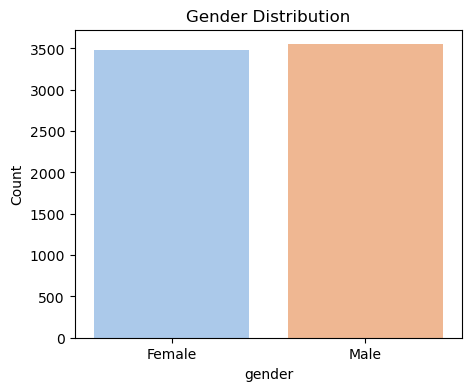

In [28]:
#Gender

plt.figure(figsize=(5, 4))
sns.countplot(data=new_df, x='gender', hue='gender', palette='pastel', dodge=False, legend=False)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

**The distribution of male and female customers is nearly equal, indicating a balanced gender representation.**

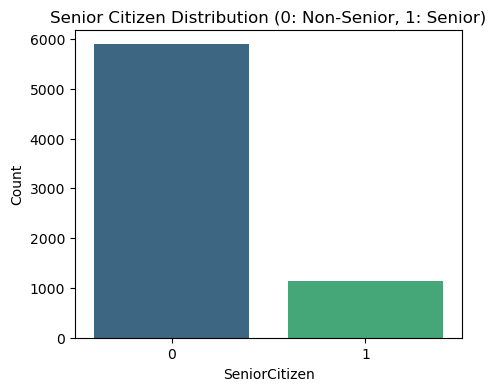

In [29]:
#SeniorCitizen

plt.figure(figsize=(5, 4))
sns.countplot(data=new_df, x='SeniorCitizen',hue='SeniorCitizen', palette='viridis', dodge=False, legend=False)
plt.title('Senior Citizen Distribution (0: Non-Senior, 1: Senior)')
plt.ylabel('Count')
plt.show()

**There are fewer senior citizens compared to non-seniors, suggesting a younger customer base.**

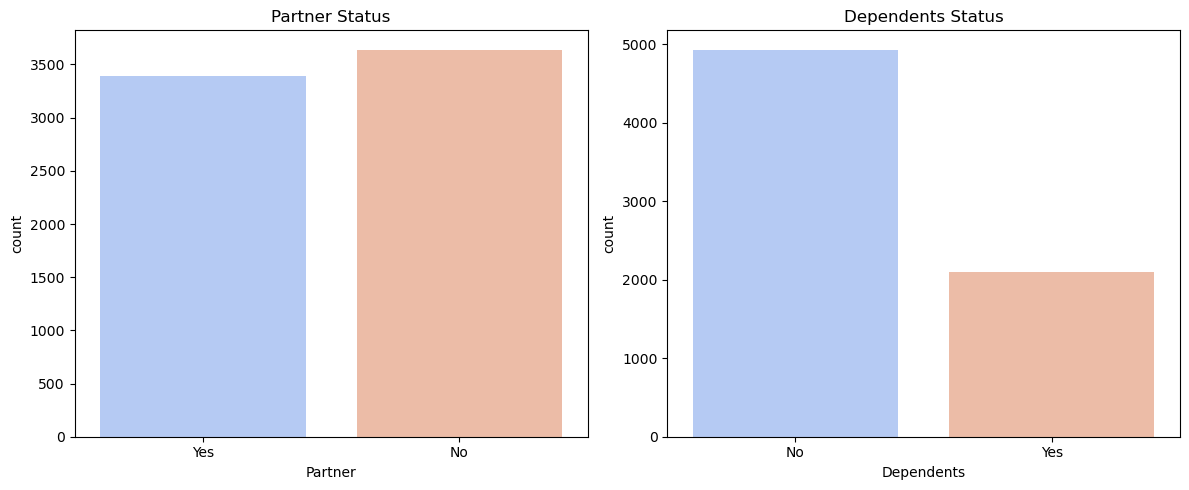

In [30]:
# Partner and Dependents
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=new_df, x='Partner', hue='Partner', ax=ax[0], palette='coolwarm', dodge=False, legend=False)
ax[0].set_title('Partner Status')

sns.countplot(data=new_df, x='Dependents', hue='Dependents', ax=ax[1], palette='coolwarm', dodge=False, legend=False)
ax[1].set_title('Dependents Status')

plt.tight_layout()
plt.show()

**Many customers do not have dependents, and a significant portion also does not have partners, possibly indicating single-person households.**

#### 2. Service-related Features

In [31]:
# PhoneService and MultipleLines counts
phone_service_counts = new_df['PhoneService'].value_counts()
multiple_lines_counts = new_df['MultipleLines'].value_counts()

print("Phone Service Status:")
print(phone_service_counts)

print("\nMultiple Lines Status:")
print(multiple_lines_counts)

Phone Service Status:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Multiple Lines Status:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


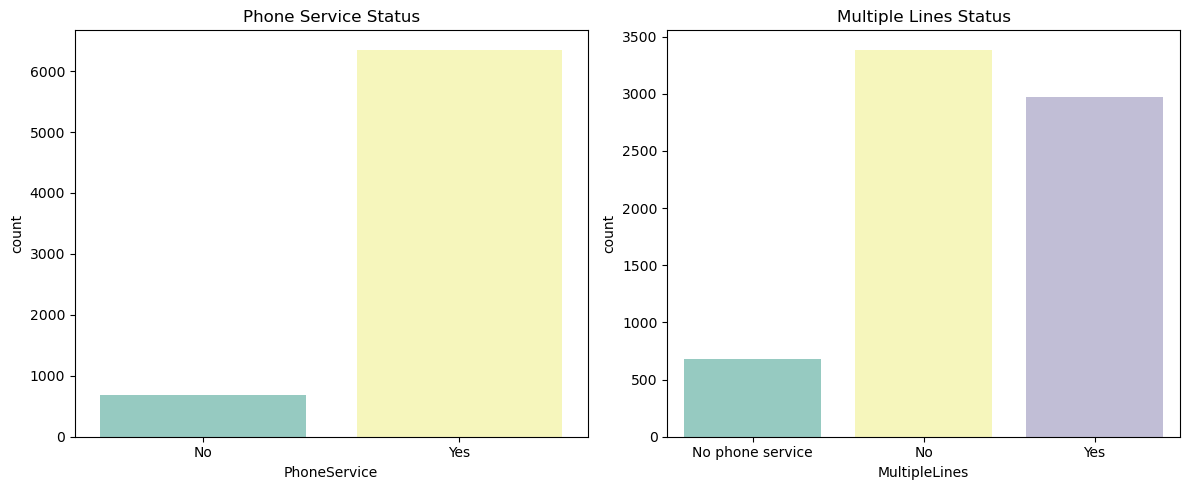

In [32]:
# PhoneService and MultipleLines

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=new_df, x='PhoneService', hue='PhoneService', ax=ax[0], palette='Set3',dodge=False, legend=False)
ax[0].set_title('Phone Service Status')

sns.countplot(data=new_df, x='MultipleLines', hue='MultipleLines', ax=ax[1], palette='Set3',dodge=False, legend=False)
ax[1].set_title('Multiple Lines Status')

plt.tight_layout()
plt.show()


This indicates that the majority of customers in the dataset (6352) have an active phone service, while a smaller portion (680) do not.

Among customers with a phone service, more people (3385) have opted for single-line service compared to those with multiple lines (2967).
The No phone service category here is consistent with the 680 customers who don't have a phone service in the PhoneService column.

**The dataset reflects customer preferences for phone services, showing that the majority have a phone service and a significant proportion prefer single lines over multiple lines.**

In [33]:
# PhoneService and MultipleLines counts
InternetService =new_df['InternetService'].value_counts()
print("InternetService :")
print(InternetService)

InternetService :
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


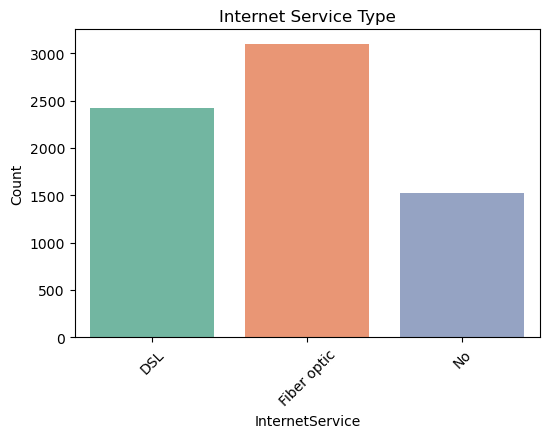

In [34]:
# InternetService

plt.figure(figsize=(6, 4))
sns.countplot(data=new_df, x='InternetService',hue='InternetService', palette='Set2',legend=False)
plt.title('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Fiber optic: Most popular with 3096 customers.

DSL: Used by 2416 customers, the second most preferred option.

No service: 1520 customers do not have internet service.

**Key Insight: Fiber optic is the leading choice, while a notable segment lacks internet access, highlighting potential growth opportunities.**

**This information can be useful for businesses to:**

Understand customer preferences.

Plan service upgrades (e.g., transitioning DSL users to fiber optic).

Identify regions with no internet service for potential expansion.

In [35]:
# PhoneService and MultipleLines counts
OnlineSecurity = new_df['OnlineSecurity'].value_counts()
OnlineBackup = new_df['OnlineBackup'].value_counts()

print("Online Security Status:")
print(OnlineSecurity)

print("\nOnline Backup Status:")
print(OnlineBackup)


Online Security Status:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

Online Backup Status:
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


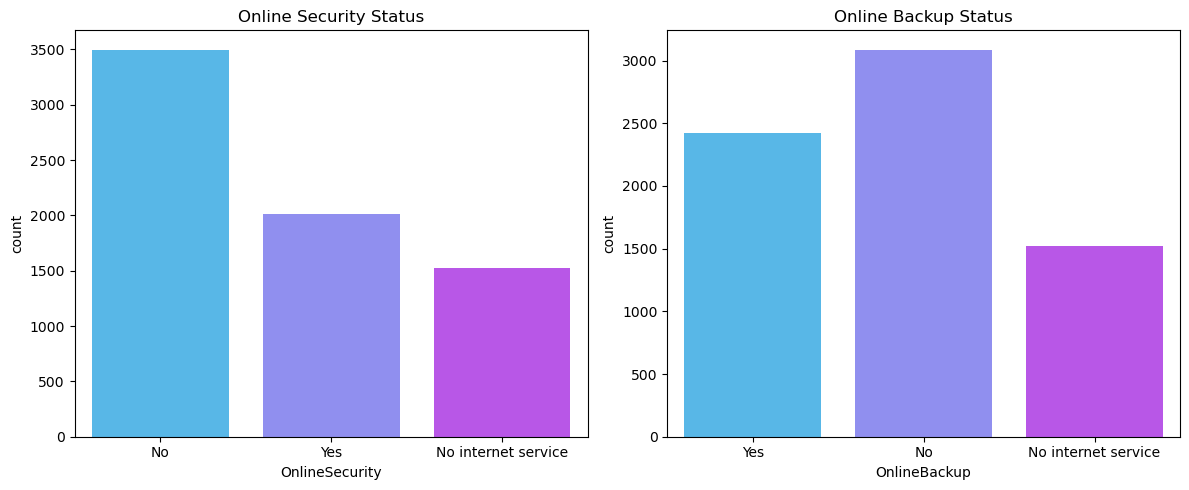

In [36]:
## OnlineSecurity and OnlineBackup

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=new_df, x='OnlineSecurity',hue='OnlineSecurity', ax=ax[0], palette='cool',legend=False)
ax[0].set_title('Online Security Status')

sns.countplot(data=new_df, x='OnlineBackup',hue='OnlineBackup', ax=ax[1], palette='cool',legend=False)
ax[1].set_title('Online Backup Status')

plt.tight_layout()
plt.show()

A significant portion of customers with internet services have not opted for online security (3497) or online backup (3087) features.

Online backup has slightly higher adoption (2425) than online security (2015).

The 1520 customers without internet service are excluded from accessing these features.


**Promoting online security and backup services to the large number of customers not using them can drive additional revenue and enhance customer retention. Expanding internet access to users without service can further increase adoption of these features.**

#### 3. Billing Information

In [37]:
# Contract Type
# PhoneService and MultipleLines counts
Contract = new_df['Contract'].value_counts()
print("Contract Type Status:")
print(Contract)



Contract Type Status:
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


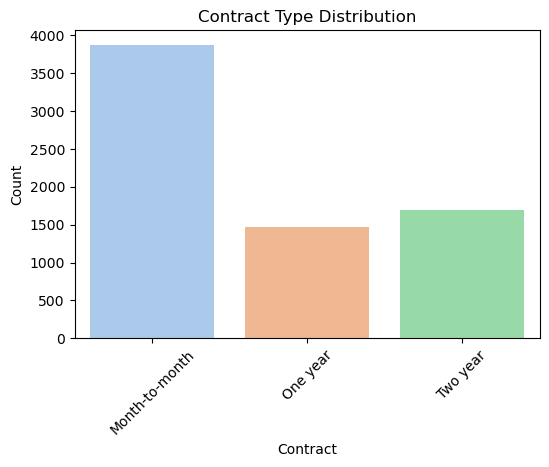

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Contract',hue='Contract', palette='pastel')
plt.title('Contract Type Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**The most common contract type is month-to-month, which may be associated with higher churn rates compared to longer-term contracts.**

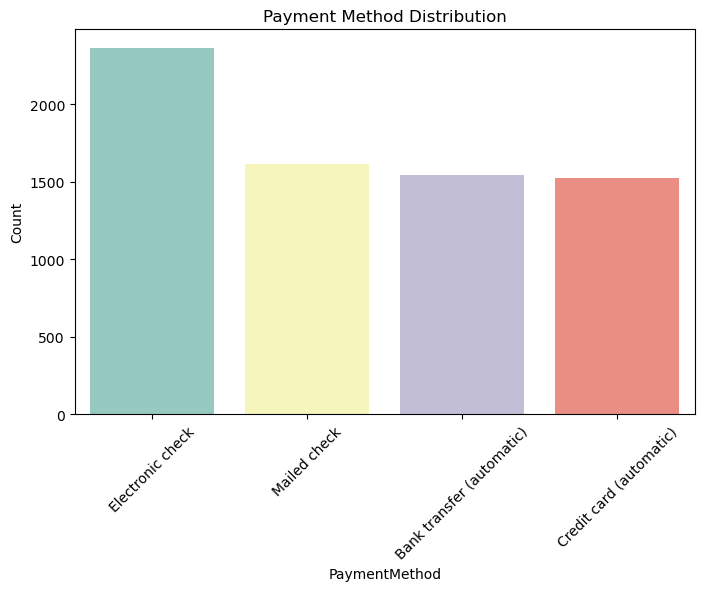

In [39]:
# Payment Method
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PaymentMethod',hue='PaymentMethod', palette='Set3')
plt.title('Payment Method Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**The use of electronic checks is prominent, which may correlate with churn if issues with payments arise.**

#### 4. Numerical Features Analysis

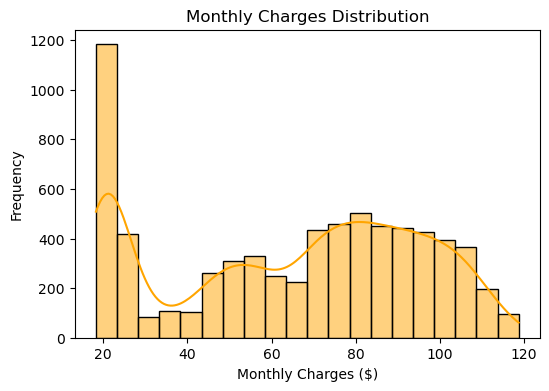

In [40]:
plt.figure(figsize=(6, 4))
sns.histplot(new_df['MonthlyCharges'], bins=20, kde=True, color='orange')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

Counts: [1183  417   85  106  102  263  308  329  248  224  434  460  502  450
  444  425  393  365  198   96]
Bin Edges: [ 18.25   23.275  28.3    33.325  38.35   43.375  48.4    53.425  58.45
  63.475  68.5    73.525  78.55   83.575  88.6    93.625  98.65  103.675
 108.7   113.725 118.75 ]


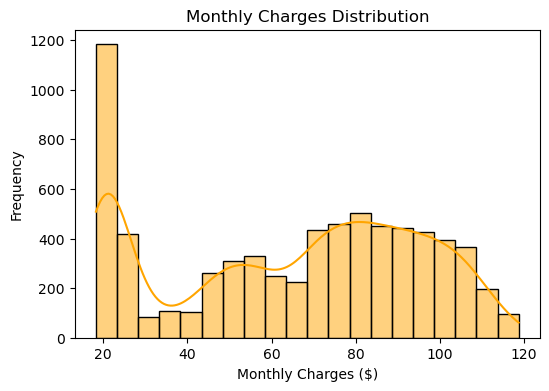

In [41]:
import numpy as np

# Compute histogram data using numpy
counts, bin_edges = np.histogram(new_df['MonthlyCharges'], bins=20)

# Display numerical values
print("Counts:", counts)
print("Bin Edges:", bin_edges)

# Optionally plot the histogram for comparison
plt.figure(figsize=(6, 4))
sns.histplot(new_df['MonthlyCharges'], bins=20, kde=True, color='orange')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

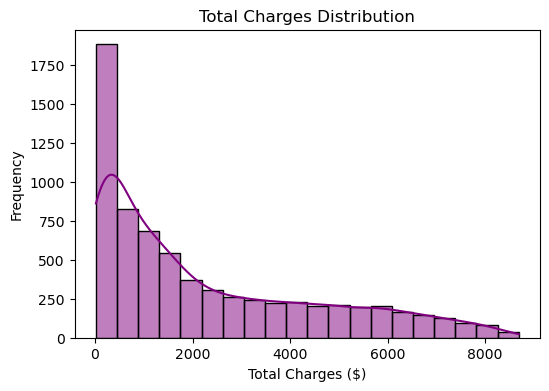

In [42]:
##TotalCharges
plt.figure(figsize=(6, 4))
sns.histplot(new_df['TotalCharges'], bins=20, kde=True, color='purple')
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.show()

#### 5. Target Feature: Churn

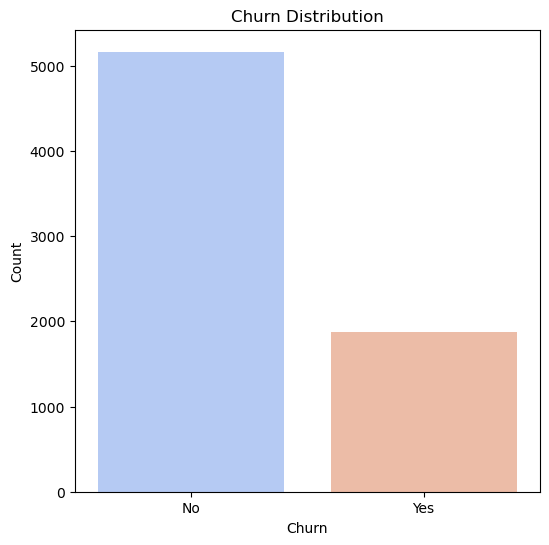

In [43]:
plt.figure(figsize=(6, 6))
sns.countplot(data=new_df, x='Churn',hue='Churn', palette='coolwarm')
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.show()

**The churn rate is significant, indicating that many customers leave the service. This is an essential factor for churn prediction analysis.**

In [44]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [45]:
new_df_target0=new_df[new_df['Churn']=='No']
new_df_target1=new_df[new_df['Churn']=='Yes']

In [46]:
pd.crosstab(new_df.PaymentMethod,new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [47]:
new_df["Churn"]=np.where(new_df.Churn=='Yes',1,0)

In [48]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-11
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-275
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-11
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-407
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-11


In [49]:
new_df_dummies=pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-11,tenure_group_13-143,tenure_group_25-275,tenure_group_37-407,tenure_group_49-539,tenure_group_61-671
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


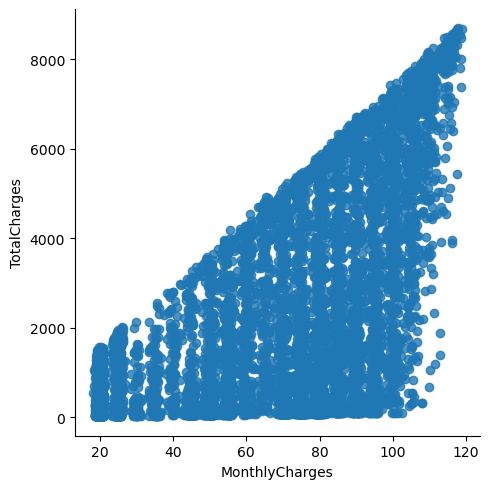

In [50]:
sns.lmplot(data=new_df_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [51]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262024

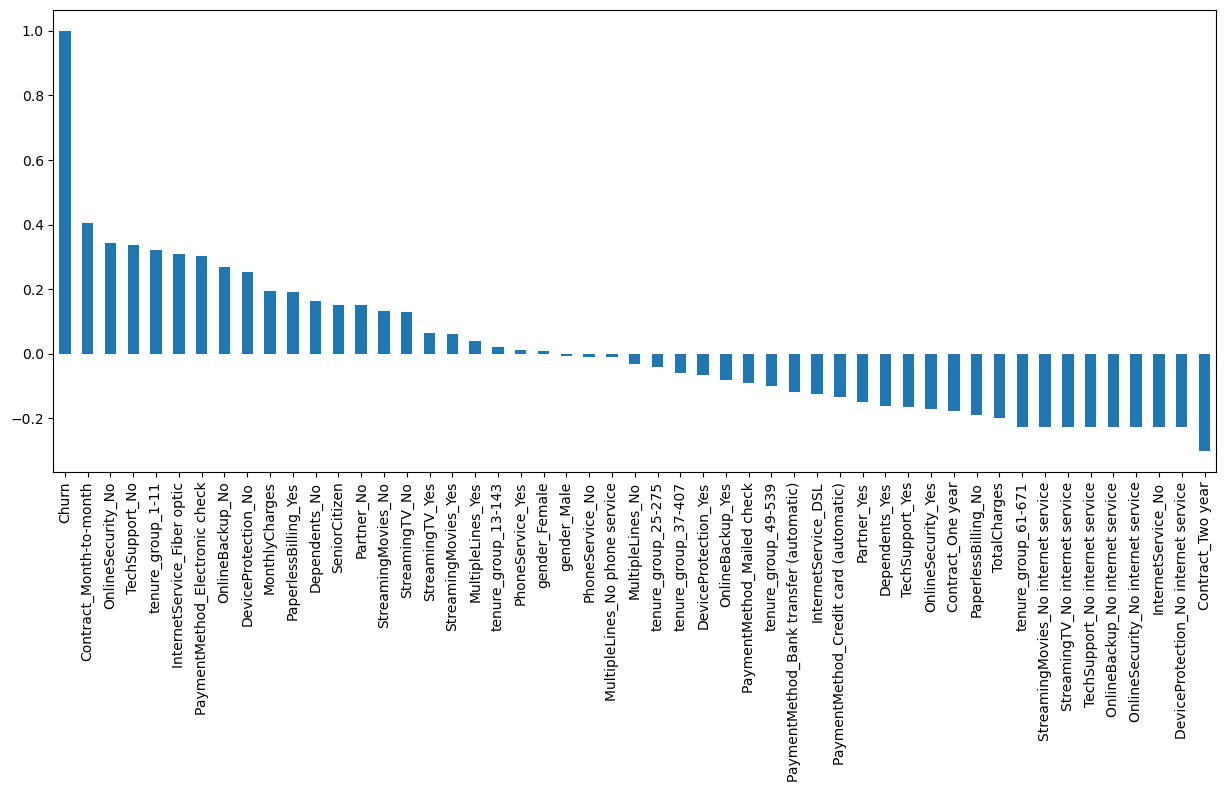

In [52]:
plt.figure(figsize=(15,6))
new_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

### Bivariate Analysis Overview

We will focus on:

##### Demographic Factors vs. Churn:
    gender vs. Churn
    SeniorCitizen vs. Churn
    Partner vs. Churn
    Dependents vs. Churn
##### Service-related Factors vs. Churn:
    InternetService vs. Churn
    OnlineSecurity vs. Churn
    TechSupport vs. Churn
    Contract vs. Churn
##### Billing Information vs. Churn:
    PaymentMethod vs. Churn
    MonthlyCharges vs. Churn
    TotalCharges vs. Churn

#### 1. Demographic Factors vs. Churn

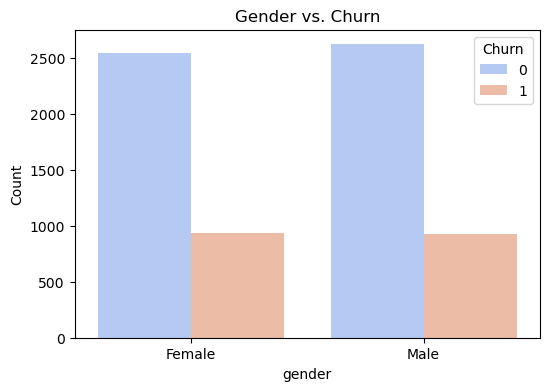

In [53]:
# gender vs. Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=new_df, x='gender', hue='Churn', palette='coolwarm')
plt.title('Gender vs. Churn')
plt.ylabel('Count')
plt.show()

**Churn rates between male and female customers are relatively similar, suggesting gender may not be a strong predictor of churn.**

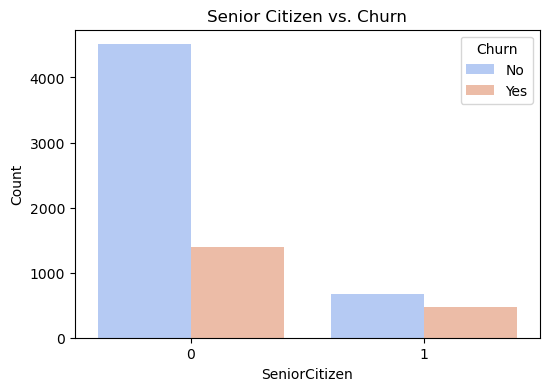

In [54]:
#SeniorCitizen vs. Churn

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='coolwarm')
plt.title('Senior Citizen vs. Churn')
plt.ylabel('Count')
plt.show()


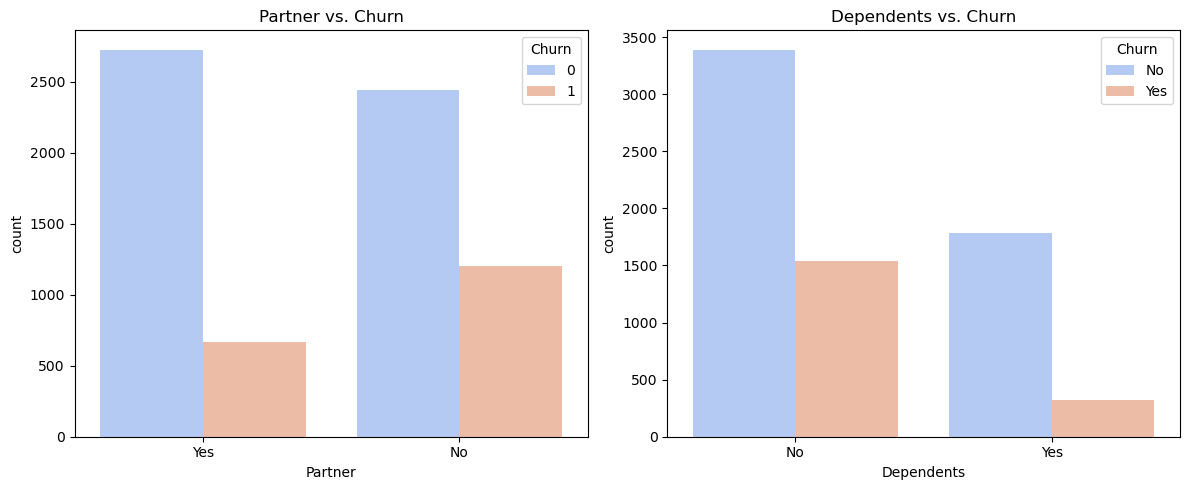

In [55]:
# Partner and Dependents vs. Churn

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=new_df, x='Partner', hue='Churn', ax=ax[0], palette='coolwarm')
ax[0].set_title('Partner vs. Churn')

sns.countplot(data=df, x='Dependents', hue='Churn', ax=ax[1], palette='coolwarm')
ax[1].set_title('Dependents vs. Churn')

plt.tight_layout()
plt.show()

**Customers without partners have a higher churn rate.**

**Customers without dependents are also more likely to churn, possibly indicating they are more cost-sensitive.**

#### 2. Service-related Factors vs. Churn

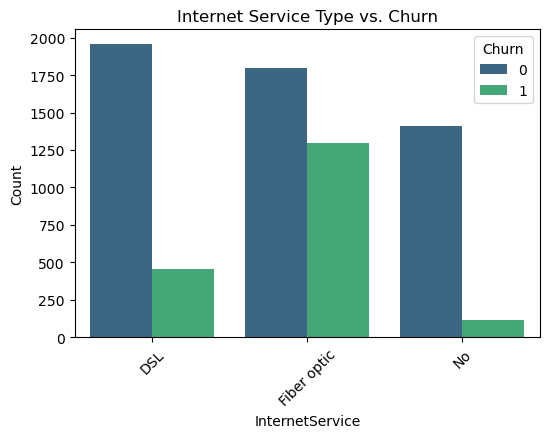

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(data=new_df, x='InternetService', hue='Churn', palette='viridis')
plt.title('Internet Service Type vs. Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Fiber optic users exhibit a higher churn rate, potentially due to issues like service disruptions or higher costs.**

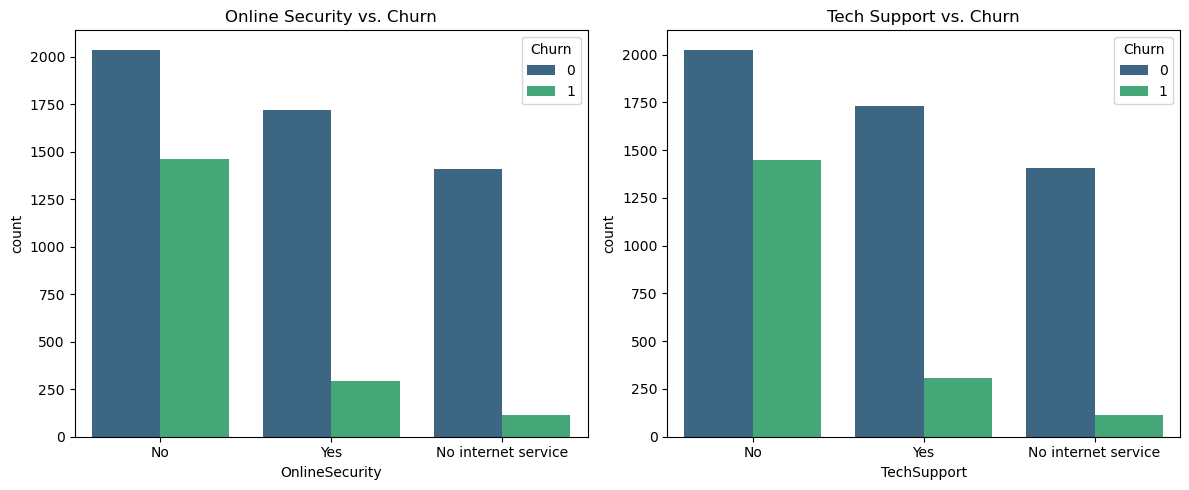

In [57]:
#OnlineSecurity and TechSupport vs. Churn

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=new_df, x='OnlineSecurity', hue='Churn', ax=ax[0], palette='viridis')
ax[0].set_title('Online Security vs. Churn')

sns.countplot(data=new_df, x='TechSupport', hue='Churn', ax=ax[1], palette='viridis')
ax[1].set_title('Tech Support vs. Churn')

plt.tight_layout()
plt.show()

**Customers without online security and tech support are more likely to churn, highlighting these as critical services for customer retention.**

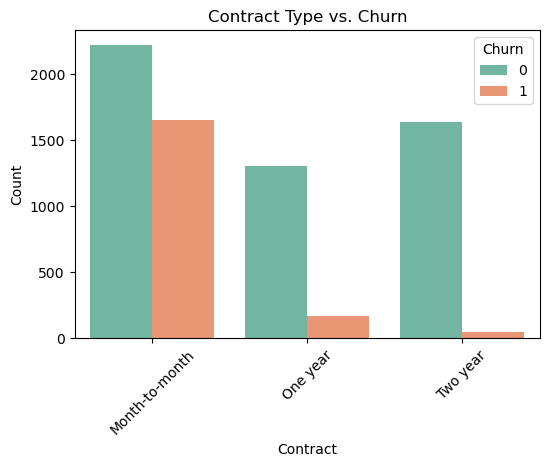

In [58]:
## Contract Type vs. Churn

plt.figure(figsize=(6, 4))
sns.countplot(data=new_df, x='Contract', hue='Churn', palette='Set2')
plt.title('Contract Type vs. Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Month-to-month customers have the highest churn rate, while those with longer-term contracts are less likely to churn. This suggests that longer contracts can help reduce churn.**

#### 3. Billing Information vs. Churn

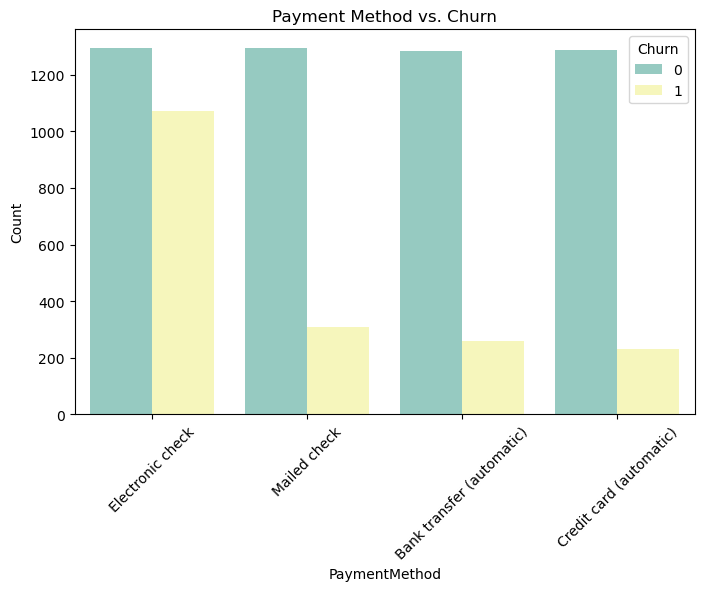

In [59]:
#PaymentMethod vs. Churn

plt.figure(figsize=(8, 5))
sns.countplot(data=new_df, x='PaymentMethod', hue='Churn', palette='Set3')
plt.title('Payment Method vs. Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Customers using electronic checks have a significantly higher churn rate, which may be linked to dissatisfaction with payment experiences or fees.**

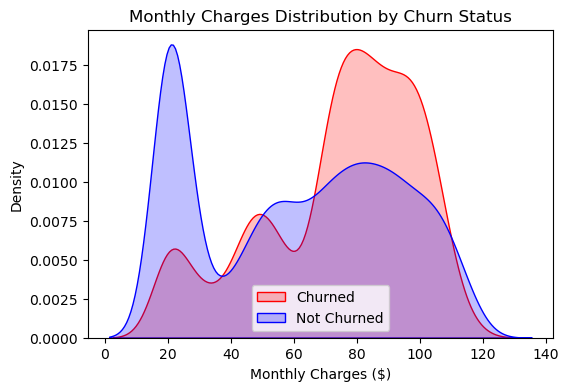

In [60]:
# MonthlyCharges vs. Churn
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='MonthlyCharges', fill=True, color='red', label='Churned',warn_singular=False)
sns.kdeplot(data=df[df['Churn'] == 'No'], x='MonthlyCharges', fill=True, color='blue', label='Not Churned',warn_singular=False)
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [61]:
# Converting TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checking for null values
df['TotalCharges'].fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7164\3247812981.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


**Customers with higher monthly charges are more likely to churn, indicating that cost is a significant factor in their decision to leave.**

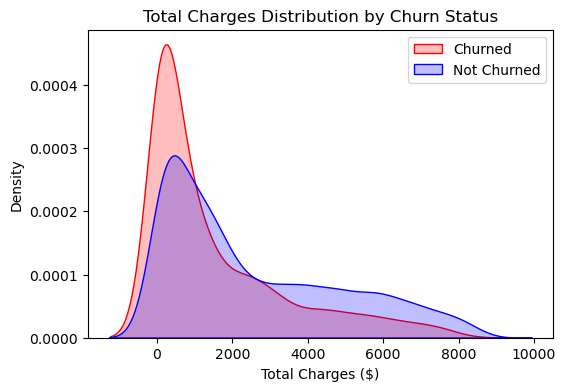

In [62]:
# TotalCharges vs. Churn

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='TotalCharges', fill=True, color='red', label='Churned')
sns.kdeplot(data=df[df['Churn'] == 'No'], x='TotalCharges', fill=True, color='blue', label='Not Churned')
plt.title('Total Charges Distribution by Churn Status')
plt.xlabel('Total Charges ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

## Multivariate Analysis Overview
The main goals are:

**Correlation Analysis:** Understanding the relationships between numerical variables like tenure, MonthlyCharges, and TotalCharges.

**Heatmap Analysis:** Visualizing correlations to identify significant relationships.
    
**Churn Rate Analysis** with categorical features to see the combined effect of factors like Contract, InternetService, and PaymentMethod on churn.

Logistic Regression: As an exploratory step, we can use logistic regression to check the importance of different features.

##### 1. Correlation Analysis

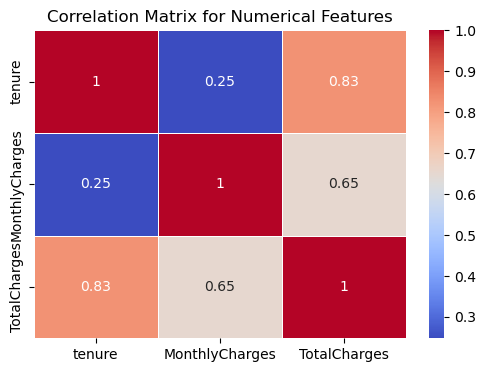

In [63]:
# Computing the correlation matrix
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


There is a strong positive correlation between TotalCharges and tenure, as expected. This makes sense because the longer a customer stays, the higher the total charges.

MonthlyCharges shows a moderate positive correlation with TotalCharges.

##### 2. Churn Rate Analysis with Categorical Variables

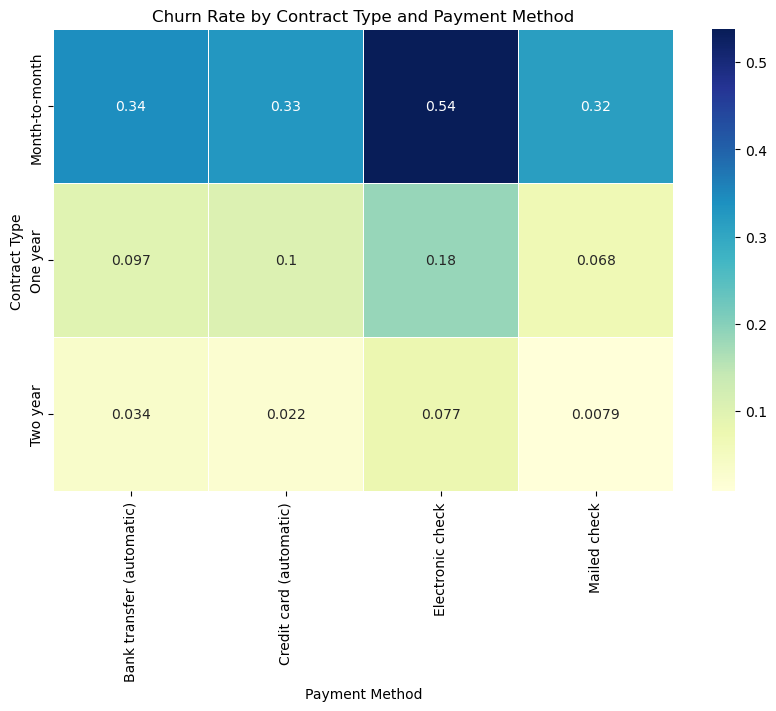

In [64]:
##Contract Type and Payment Method vs. Churn

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Contract'], df['PaymentMethod'], values=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0), aggfunc='mean'), 
            annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Churn Rate by Contract Type and Payment Method')
plt.ylabel('Contract Type')
plt.xlabel('Payment Method')
plt.show()

Month-to-month contracts with electronic checks have the highest churn rates, while longer-term contracts with automatic payments have the lowest.

This suggests that customers on flexible payment plans may feel less commitment, especially when using less convenient payment methods.

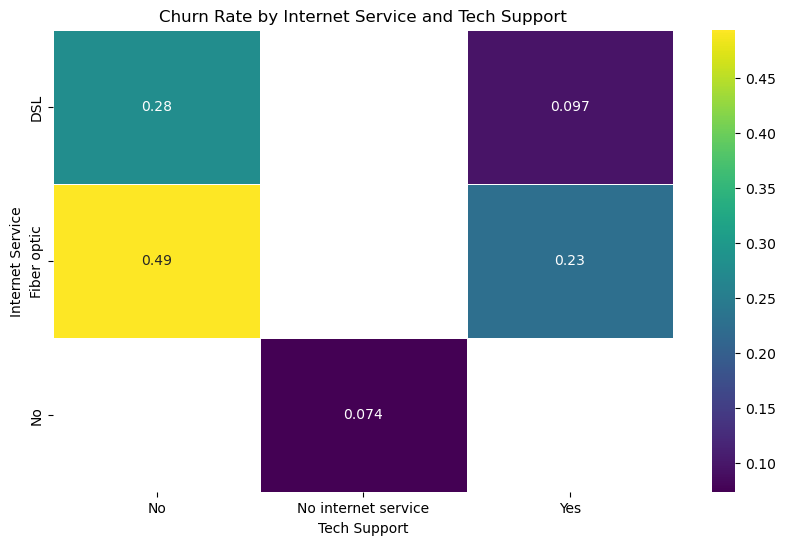

In [65]:
##Internet Service and Tech Support vs. Churn

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['InternetService'], df['TechSupport'], values=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0), aggfunc='mean'), 
            annot=True, cmap='viridis', linewidths=0.5)
plt.title('Churn Rate by Internet Service and Tech Support')
plt.ylabel('Internet Service')
plt.xlabel('Tech Support')
plt.show()

Fiber optic customers without tech support have the highest churn rates, indicating that service issues may significantly impact retention for this group.

DSL and customers with tech support have much lower churn rates.

**Customers with lower total charges tend to churn more, which could be due to shorter tenures with the company.**

In [66]:
new_df_target0=new_df[new_df['Churn']==0]
new_df_target1=new_df[new_df['Churn']==1]

In [67]:
len(new_df_target0)

5163

In [68]:
len(new_df_target1)

1869

In [69]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30

    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7 + 4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks()
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')

Conclusion from Multivariate Analysis:

High Churn Risk Factors:

Month-to-month contracts, electronic check payments, and the absence of tech support services are strong predictors of churn.
    
Fiber optic service customers without additional support services are particularly at risk.
    
Strategies to Reduce Churn:

Encourage longer-term contracts and auto-payment setups.
    
Offer improved support services, especially for customers using fiber optic services.